---

## Table of Contents
[Project description](#Description)  
[Introduction](#Introduction)  
[Exploratory Data Analysis](#EDA)  
[Model fit to training data, checking assumptions](#Model_fit)  
[Hypothesis tests](#Hyp_tests)  
[Using the model for prediction](#Prediction)  
[Comparing to other candidate models](#Compare) 
[Discussion](#Discussion)


[Visualizing appropriate transformations](#Transformations)  
[Other candidate models](#Other_models)

---

<a id="Description"></a>
## Project description

You will develop a multiple linear regression model to predict sale price of houses (\\$ CAD) in Vancouver using the following potential candidate quantitative variables:  
- Days on market (days)
- Total floor area (square feet)
- Age (years); this is calculated from Year Built so you do not need to use Year Built
- Lot Size (square feet)

The data was collected from detached homes with sale prices of at most \\$3 million in 2019 and early 2020, prior to any impacts of the pandemic on the real estate market in Vancouver.  Note that because we are excluding all houses with prices over \\$3 million, the data may appear truncated.  

Assume that we are trying to predict sale price for the same time period that the data was collected. Consider how predicting sale price could be valuable for realtors representing both house sellers and house buyers.  

### Methods  
  
First, you will divide the dataset into a training set and a validation set. You will use the training set to develop your model. You can transform variables as appropriate. Note that if you transform age using a power transformation or a log transformation, you should add 1 year to all the values of age first.   
  
You will conduct exploratory data analysis, visualizing the relationships between the variables. You should include code for visualizing appropriate transformations at the end of the project.  

In the main part of the project, you will present the results of your best model (referred to as the final model), which you will choose by considering the following:
- checking assumptions are met
- assessing goodness of fit to the training set
- considering the variables and complexity of the model
- assessing how well the model predicts new data (using the validation set as new data)

Before creating any models, you should consider is the objective and which variables you would have access to when attempting to use the model to create predictions.

At the end of the project, you should include code for any other candidate models that you considered. 
  
You will discuss the strengths and limitations of your final model, and provide any recommendations to address the limitations.

---

<a id="Introduction"></a>
# Introduction  - Part A
<code style="color:black"> 

Vancouver has always been known as one of the largest real estate bubbles in Canada, and its housing sales prices have mostly been on the rise. Therefore, it is imperative for realtors to be able to predict this price trend with a fitted and tested linear regression model and advise their clients with well informed data insights. 

In order to build such a model, we will use a dataset of Vancouver's housing price for 2019 and early 2020. It is worthy to note that prices of over $3 million and prices collected during the pandemic are not considered, since they don't represent the 'normality' of this market. The quantitative variables used to predict sale prices are as follows 

- Days on market (days)
- Total floor area (square feet)
- Age (years)
- Lot Size (square feet)

The model will help highlight which quantitative variables are most relevant to predicting the housing price and provide precise estimates of the co-efficients to determine the size of the effect of the variables on the price. 

Once we have developed and validated the model, we will be able to accurately apply it to any other datasets. Realtors can then use this model to predict Vancouver's housing market price for the time to come and better advise both house sellers & house buyers. 

In [1]:
# Import the data:

mydata <- read.csv('House sale data Vancouver.csv')

---
*The dataset includes the following variables:*
- Number: if your observations get out of order, please sort by Number to get them back in the correct order so that everyone will work with the same training set and validation set.
- Address: Address of the house.
- List.Date: The date that the house was listed for sale.
- Price: The final sale price of the house (\\$ CAD). Note that this may differ from what the original asking price was.
- Days.on.market: how many days the house was on the market before it sold.
- Total.floor.area: the total area in square feet of the finished living space, including kitchen, bathrooms, living room, bedrooms, etc. on all floors of the house
- Year.Built: the year when the house was built.
- Age: calculated from Year.Built to represent the house age around the time of sale.
- Lot.size: the size of the lot in square feet. This includes the area of the footprint of the house, and the area of any yard or garden.
---

In [2]:
# Create a training set and a validation set using the following code
# This will divide the dataset into ~80% training set (1042 observations)
# and ~ 20% validation set (260 observations)


mydata.train <- mydata[1:1042,]
mydata.valid <- mydata[1043:nrow(mydata),]

mydata.train


,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,1,3178 GRAVELEY STREET,5/8/2020,1500000,18,2447,1946,74,5674.00
2,2,1438 E 28TH AVENUE,1/22/2020,1300000,7,2146,1982,38,3631.98
3,3,2831 W 49TH AVENUE,6/18/2019,2650000,1,3108,1929,90,9111.00
4,4,2645 TRIUMPH STREET,6/18/2019,1385000,28,2602,1922,97,4022.70
5,5,741-743 E 10TH AVENUE,11/28/2019,1590000,17,1843,1970,49,4026.00
6,6,86 W 21ST AVENUE,3/3/2020,2565000,7,2439,1989,31,4026.00
7,7,2418 E 54TH AVENUE,8/12/2019,1303000,9,2100,1979,40,3298.48
8,8,1787 E 57TH AVENUE,6/13/2019,1150000,10,1900,1950,69,6574.82
9,9,2926 TRIMBLE STREET,8/16/2019,2500000,10,2133,2005,14,3360.00


---
<a id="EDA"></a>
# Exploratory data analysis- Part A
<code style="color:black"> 



The downloaded binary packages are in
	/var/folders/yt/b9xrr1x953g19fj3s6yzr4tm0000gn/T//RtmpUkAmPQ/downloaded_packages



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1074817  -433250  -151314        0   424033  1229301 

[1] 1709958

[1] -1719174

Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,Residuals
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>


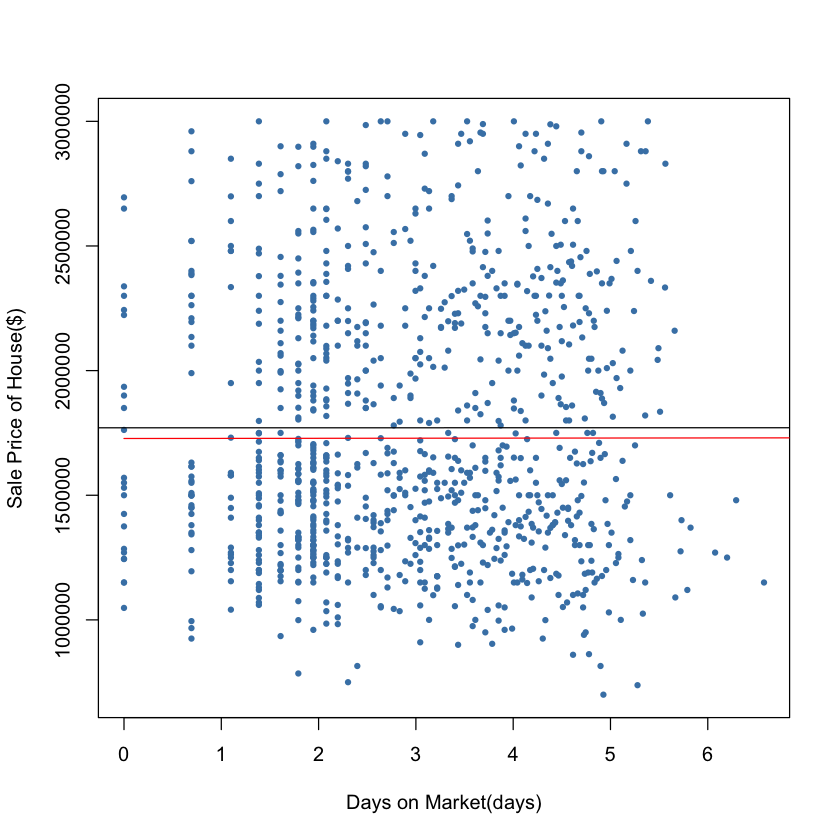

In [3]:
# code for making the plot:

#Plot1: Sale price of House vs Days on Market(days)

#Install and import 'dplyr'
install.packages("dplyr")
library(dplyr)

#Plot Scatterplot
plot(log(mydata.train$Days.on.market), mydata.train$Price, xlab = 'Days on Market(days)', 
     ylab = 'Sale Price of House($)', pch = 16, col = 'steelblue', cex = 0.70)

#Draw lowess line
lines(lowess(mydata.train$Days.on.market, mydata.train$Price, f=3), col='red')

#Draw linear Regression Trendline
model.1 <- lm(mydata.train$Price ~ mydata.train$Days.on.market, data = mydata.train) ; abline(model.1)

#Identify outliers via residuals
mydata.train$Residuals <- residuals(model.1)
summary(residuals(model.1))
Upper.1 <- 424033 + (424033+433250)*1.5 ; Upper.1
Lower.1 <- -433250 - (424033+433250)*1.5 ; Lower.1

#Store outliers in a variable
outliers.days.price <- mydata.train %>% filter(Residuals > Upper.1 | Residuals < Lower.1  ) ; outliers.days.price

#Highlight outliers on scatterplot
points(x = outliers.days.price$Days.on.market, y = outliers.days.price$Price, pch = 25, bg = 'red')


Association for Sale Price of House vs Days on Market   
    1. Form: Non-linear  
    2. Direction: No association between variables; as slope of regression line is 0  
    3. Strength: Weak  
    4. Outliers: Because there is a lot of scatter between the two variables, we cannot determine outliers

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1244927  -309103  -101646        0   263813  1902266 

[1] 1123187

[1] -1168477

Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,Residuals
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
14,2855 W 38TH AVENUE,5/25/2020,2880000,2,2286,1941,79,5808.00,1184101
97,836 W 22ND AVENUE,5/12/2020,2689000,0,1402,1926,94,5124.00,1391907
325,2128 W 21ST AVENUE,4/27/2020,2760000,0,1616,1930,90,6100.00,1366363
342,3962 W 30TH AVENUE,9/19/2019,2898000,6,734,1929,90,6500.00,1902266
539,3954 W 30TH AVENUE,2/18/2020,2960000,2,2473,1955,65,6508.50,1179738
645,4167 W 11TH AVENUE,10/22/2019,2300000,107,974,1988,32,4026.00,1195993
685,3090 KINGS AVENUE,7/25/2019,700000,138,2838,1910,110,4425.00,-1244927
812,3888 W 22ND AVENUE,9/6/2019,2910000,78,2485,1930,89,6041.48,1124325
821,3508 W 17TH AVENUE,6/28/2019,2880000,110,2317,2016,3,3300.00,1170116


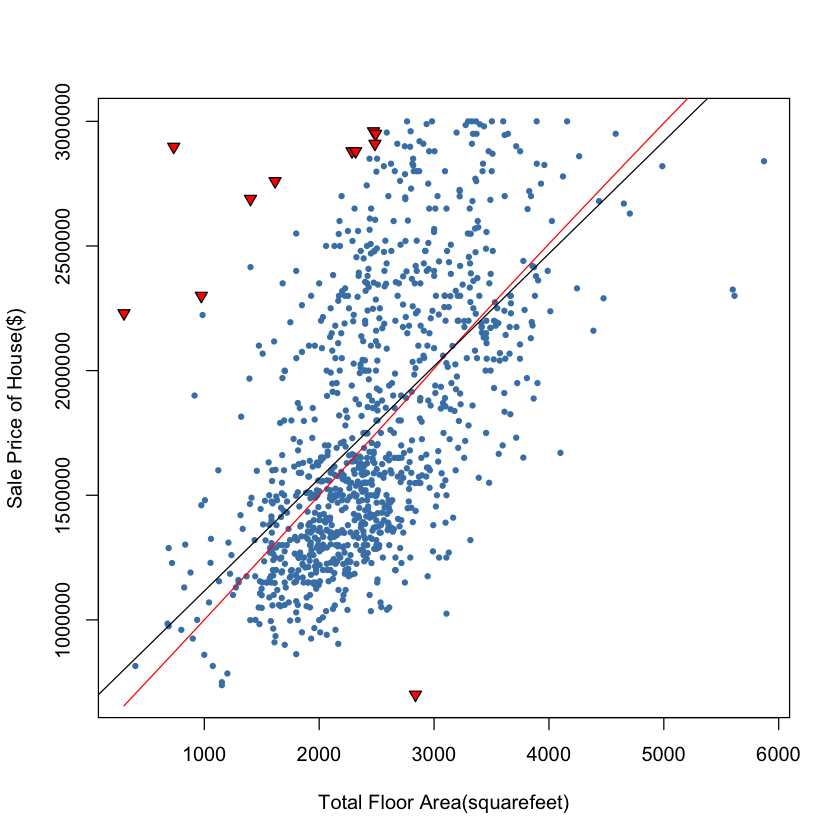

In [4]:
#Plot 2: Sale price of House vs Total Floor Area(squarefeet)

#Plot Scatterplot
plot(mydata.train$Total.floor.area, mydata.train$Price, xlab = 'Total Floor Area(squarefeet)', 
     ylab = 'Sale Price of House($)', pch = 16, col = 'steelblue', cex = 0.70)

#Draw lowess line
lines(lowess(mydata.train$Total.floor.area, mydata.train$Price, f=3), col='red')

#Draw linear Regression trendline
model.2 <- lm(mydata.train$Price ~ mydata.train$Total.floor.area, data = mydata.train) ; abline(model.2)

#Identify outliers via residuals
mydata.train$Residuals <- resid(model.2)
summary(resid(model.2))
Upper.2 <- 263813+(263813 +309103)*1.5 ; Upper.2
Lower.2 <- -309103-(263813 +309103)*1.5 ; Lower.2

#Store outliers in a variable
outliers.floor.price <- mydata.train %>% filter(Residuals > Upper.2 |Residuals < Lower.2  ) ; outliers.floor.price

#Highlight outliers on scatterplot
points(x = outliers.floor.price$Total.floor.area, y = outliers.floor.price$Price, pch = 25, bg = 'red')


Association for Sale Price of House vs Total Floor Area   
    1. Form: Linear  
    2. Direction: Positive ; as slope of regression line is positive  
    3. Strength: Moderately strong  
    4. Outliers: There are 11 outliers in all, highlighted in red triangles on the plot   

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1091693  -422510  -153732        0   363475  1391758 

[1] 1542452

[1] -1601488

Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,Residuals
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>


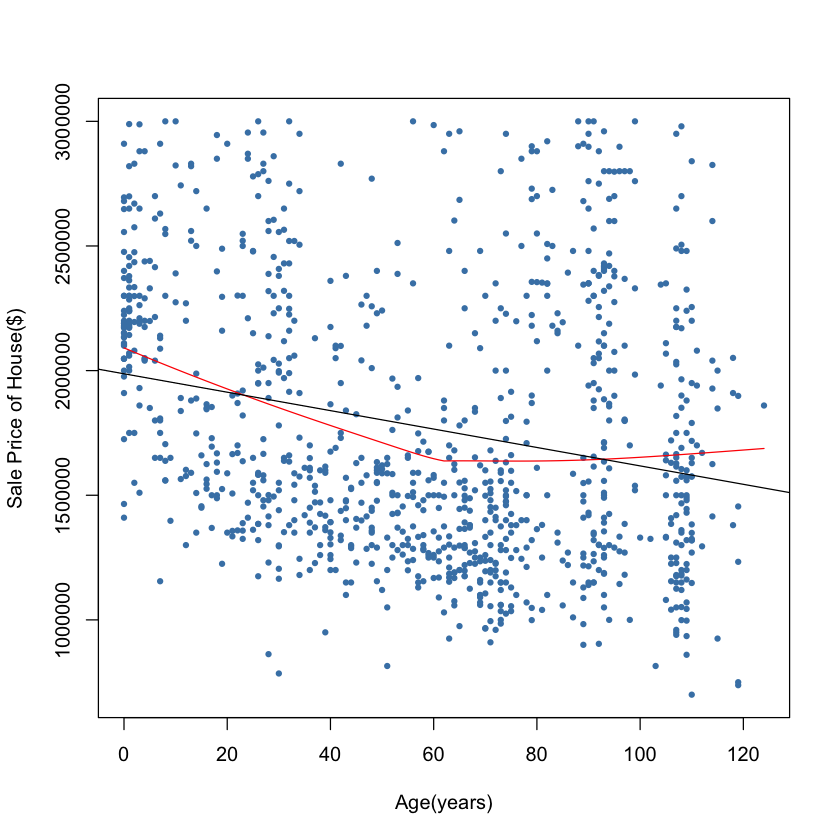

In [5]:
#Plot 3: Sale price of House vs Age(years)

#Plot Scatterplot
plot(mydata.train$Age, mydata.train$Price, xlab = 'Age(years)',
     ylab = 'Sale Price of House($)', pch = 16, col = 'steelblue', cex = 0.70)

#Draw lowess line
lines(lowess(mydata.train$Age, mydata.train$Price, f=3), col='red')

#Draw linear Regression trendline
model.3 <- lm(mydata.train$Price ~ mydata.train$Age, data = mydata.train) ; abline(model.3)

#Identify outliers via residuals
mydata.train$Residuals <- resid(model.3)
summary(resid(model.3))
Upper.3 <- 363475+(363475+422510)*1.5 ; Upper.3
Lower.3 <- -422510-(363475+422510)*1.5 ; Lower.3

#Store outliers in a variable
outliers.age.price <- mydata.train %>% filter(Residuals > Upper.3 |Residuals < Lower.3  ) ; outliers.age.price

#Highlight outliers on scatterplot
points(x = outliers.age.price$Age, y = outliers.age.price$Price, pch = 25, bg = 'red')


Association for Sale Price of House vs Age  
    1. Form: Non-linear  
    2. Direction: Negative; as slope of regression line is negative  
    3. Strength: Weak  
    4. Outliers: Because there is a lot of scatter between variables, we cannot determine outliers  

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-1470676  -396711  -122121        0   396383  1288955 

[1] 1587340

[1] -1598928

Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,Residuals
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>


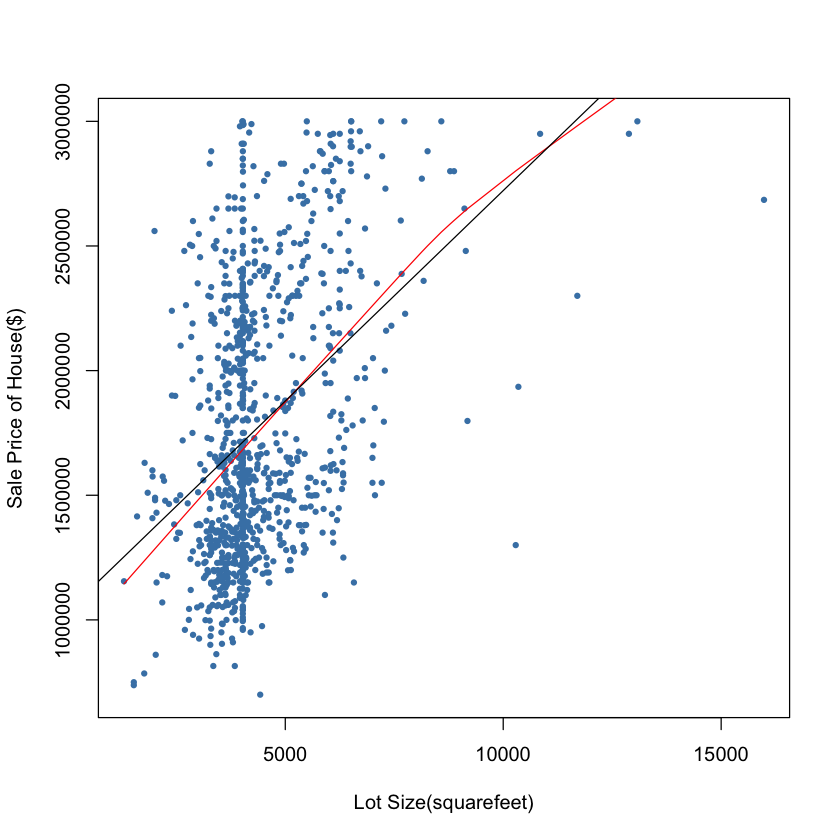

In [6]:
#Plot 4: Sale price of House vs Lot Size(squarefeet)

#Plot Scatterplot 
plot(mydata.train$Lot.Size, mydata.train$Price, xlab = 'Lot Size(squarefeet)', 
     ylab = 'Sale Price of House($)', pch = 16, col = 'steelblue', cex = 0.70)

#Draw lowess line
lines(lowess(mydata.train$Lot.Size, mydata.train$Price, f=3), col='red')

#Draw linear Regression trendline
model.4 <- lm(mydata.train$Price ~ mydata.train$Lot.Size, data = mydata.train); abline(model.4)

#Identify outliers via residuals
mydata.train$Residuals <- resid(model.4)
summary(resid(model.4))
Upper.4 <- 392489+(392489+404078)*1.5 ; Upper.4
Lower.4 <- -404078-(392489+404078)*1.5 ; Lower.4

#Store outliers in a variable
outliers.lot.price <- mydata.train %>% filter(Residuals > Upper.4 |Residuals < Lower.4 ) ; outliers.age.price

#Highlight outliers on scatterplot
points(x = outliers.age.price$Lot.Size, y = outliers.age.price$Price, pch = 25, bg = 'red')


Association for Sale Price of House vs Lot Size  
    1. Form: Non-linear  
    2. Direction: Positive as slope of regression line is positive  
    3. Strength: Weak  
    4. Outliers: Because there is a lot of scatter between variables,we cannot determine outliers  

---
<a id="Model_fit"></a>
# Model fit to training data, checking assumptions


In [7]:
#Transformations to the training dataset:
mydata.train$Log.price <- log(mydata.train$Price)

#Function to check model's residual, written by Professor Martha Essak
checkresiduals <- function(z.linear) {
  predict.values <- predict(z.linear)
  resid.values <- resid(z.linear)
  
  
  if (max(resid.values) > 3*summary(z.linear)$sigma) {
    ymax <-  max(resid.values)
  } else {
    ymax <-  3*summary(z.linear)$sigma 
  }
  
  if (min(resid.values) < -3*summary(z.linear)$sigma) {
    ymin <-  min(resid.values)
  } else {
    ymin <-  -3*summary(z.linear)$sigma 
  }
  
  
  par(mfrow=c(2,2))
  plot(resid.values ~ predict.values, ylim=c(ymin, ymax), main = "Residual plot")
  abline(0,0, lty=2)
  se <- summary(z.linear)$sigma
  abline(2*se, 0, col="red", lty=2)
  abline(-2*se, 0, col="red", lty=2)
  
  plot(resid.values, main = "Resid vs. obs #")
  abline(0,0, lty=2)
    
  hist(resid.values, prob = TRUE)
  curve(dnorm(x, mean = mean(resid.values), sd = sd(resid.values)), col = 'red', add = TRUE)
  
    
  qqnorm(resid.values, ylab= "standardized residuals", xlab = "Normal scores")
  qqline(resid.values, col= "red")
  
  shapiro.test(resid.values)
}


Call:
lm(formula = Log.price ~ Total.floor.area + Lot.Size + Age + 
    Total.floor.area * Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93695 -0.17534 -0.03332  0.17192  0.76088 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.332e+01  8.934e-02 149.066  < 2e-16 ***
Total.floor.area           3.426e-04  3.221e-05  10.636  < 2e-16 ***
Lot.Size                   1.263e-04  1.914e-05   6.600 6.56e-11 ***
Age                       -8.205e-04  2.240e-04  -3.663 0.000262 ***
Total.floor.area:Lot.Size -2.892e-08  6.465e-09  -4.473 8.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2334 on 1037 degrees of freedom
Multiple R-squared:  0.4027,	Adjusted R-squared:  0.4004 
F-statistic: 174.8 on 4 and 1037 DF,  p-value: < 2.2e-16


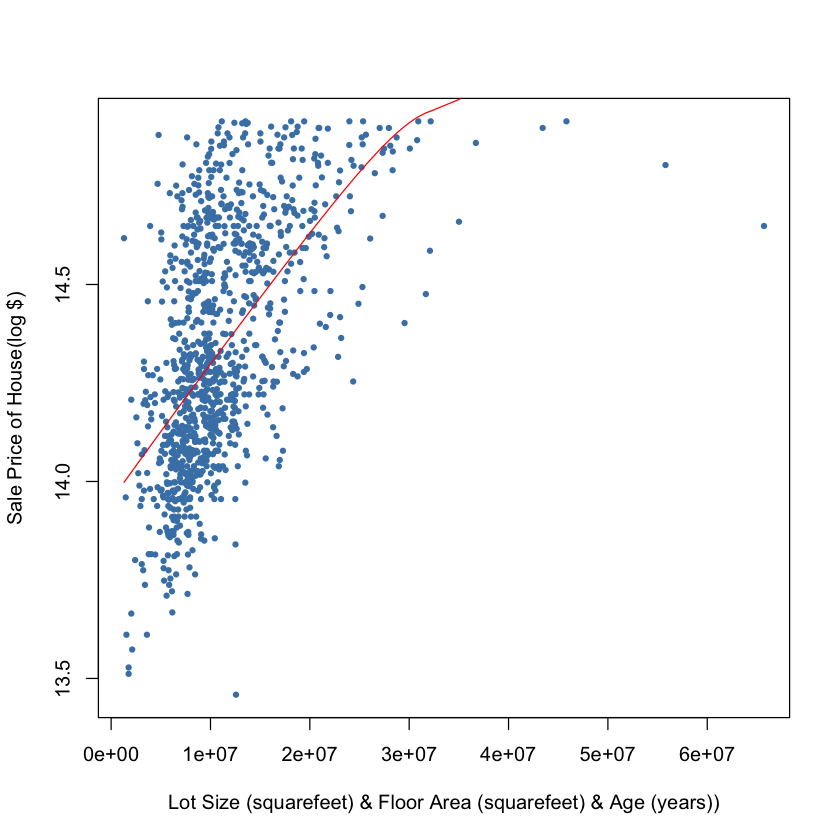

In [8]:
#Final Scatter Plot including all Explanatory variables

plot(mydata.train$Total.floor.area + mydata.train$Lot.Size + mydata.train$Age + mydata.train$Total.floor.area*mydata.train$Lot.Size, mydata.train$Log.price, xlab = 'Lot Size (squarefeet) & Floor Area (squarefeet) & Age (years))', ylab = 'Sale Price of House(log $)', pch = 16, col = 'steelblue', cex = 0.70)
lines(lowess(mydata.train$Total.floor.area + mydata.train$Lot.Size + mydata.train$Age + mydata.train$Total.floor.area*mydata.train$Lot.Size, mydata.train$Log.price, f=3), col='red')

model.f <- lm(Log.price ~ Total.floor.area + Lot.Size + Age + Total.floor.area*Lot.Size, data = mydata.train) 

summary(model.f)


### Fit final model 

In [9]:
model.f <- lm(Log.price ~ Total.floor.area + Lot.Size + Age + Total.floor.area*Lot.Size, data = mydata.train) 

summary(model.f)


Call:
lm(formula = Log.price ~ Total.floor.area + Lot.Size + Age + 
    Total.floor.area * Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93695 -0.17534 -0.03332  0.17192  0.76088 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.332e+01  8.934e-02 149.066  < 2e-16 ***
Total.floor.area           3.426e-04  3.221e-05  10.636  < 2e-16 ***
Lot.Size                   1.263e-04  1.914e-05   6.600 6.56e-11 ***
Age                       -8.205e-04  2.240e-04  -3.663 0.000262 ***
Total.floor.area:Lot.Size -2.892e-08  6.465e-09  -4.473 8.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2334 on 1037 degrees of freedom
Multiple R-squared:  0.4027,	Adjusted R-squared:  0.4004 
F-statistic: 174.8 on 4 and 1037 DF,  p-value: < 2.2e-16


The interpretation of a regression coefficient is that it represents the mean change in the dependent variable for each 1 unit change in an independent variable when you hold all of the other independent variables constant.

Predicted value for house sale price = 13.3 + (0.0003 * Total floor area) + (0.0001 * Lot size) - (0.0082 * Age) - (0.00000003 * Interaction between Total floor area & Lot size)



**Interpret the value of each co-efficient assuming that the x-variables are independent of each other (you do not need to interpret the intercept) If you have an interaction, describe the type of interaction (reinforcement, interference):**
- The more living space and floor area a house has, the more expensive it is.Thus, the log sale price will increase by 0.0003 CAD for every square feet of floor area increase.
- The more lot size space a house has, the more potential it is.Thus, the sale price will also increase, by 0.0001 CAD, for every square feet of lot size increase.
- The older a house gets, the less values it gets.Thus, the log sale price will decrease by 0.0082 CAD, for every year older it is.
- A house's floor area is limited by the its lot size, so these two variables interact with each other. Also, if both variables increase, the house's sale price will also incresae, thus a reinforcing interacton.




## Check the Assumptions 


	Shapiro-Wilk normality test

data:  resid.values
W = 0.98069, p-value = 1.545e-10


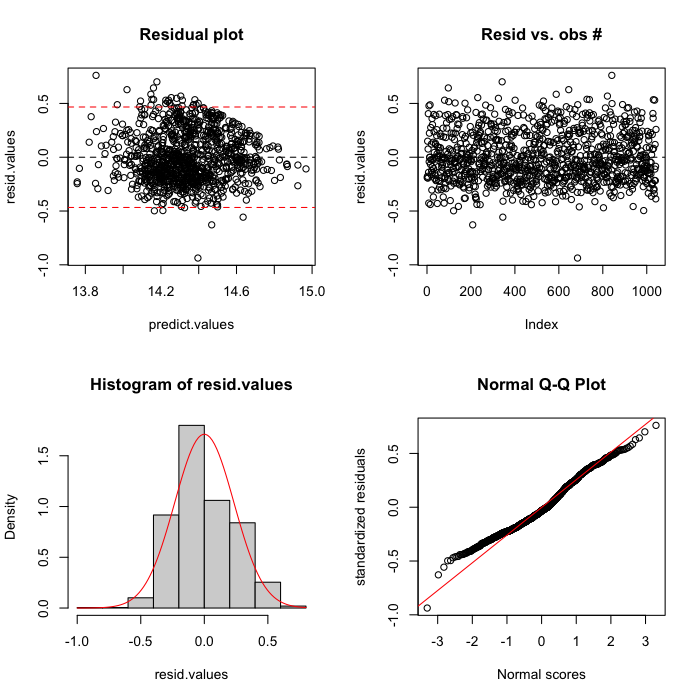

In [10]:
checkresiduals(model.f)
options(repr.plot.res = 100)

**Assumption of Linearity:** The residual plot can be used to visually check the linearity assumption. The residual values vs fitted values should be randomly scattered. 
In this case, the residual plot does not seem to follow any pattern, so we can assume linearity. 

**Assumption of Equal Variance:** The residual plot can be used to visually check the equal variance assumption. Ideally, the plot should be 
(1) Pretty symmetrically distributed, tending to cluster towards the middle of the plot
(2) Clustered around the lower single digits of the y-axis 
(3) Not showing any clear patterns. 
In this case, The plot tends to cluster towards the middle and does not form an unusual shape (bow-tie / megaphone), so we can assume equal variance. 

**Assumption of Normality**:The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.
In this case, all the points fall approximately along this reference line, so we can assume normality.


  
  
**Describe how the assumption of independence could be violated for this dataset in relation to space.**

In reality, house prices can differ depending on the neighborhood due to certain factors (e.g. access to schools, access to entertainment, crime rate etc.) Therefore, the independence of the collected prices can be violated by the houses' position in relation to each other, i.e. space. A group of houses of which addresses correspond to a certain zip code can have a small price range, and as a group their prices can differ from another zip code's group vastly. Such differences are not reflected by any of the quantifiable variables present in the dataset.



## Goodness of fit to the training set

Since our price variable is log transformed, we determine goodness of fit with Pseudo-R2 instead of R2 as follows:

In [11]:
#Generate predicted price in transformed and original forms
predict.transform <- predict(model.f, mydata.train)
mydata.train$predicted.transform <- predict.transform
mydata.train$predicted.original <- exp(mydata.train$predicted.transform)

#Calculate SS and Pseudo R2 based on original forms
SSY <- sum((mydata.train$Price - mean(mydata.train$Price))^2) 
SSE <- sum((mydata.train$Price - mydata.train$predicted.origina)^2) 
pse.R2 <- 1 - (SSE/SSY) ; pse.R2

#Calculate residual standard error
RSE <- sqrt(SSE/(1037)) ; RSE

[1] 0.3769349

[1] 425830

**Conclusion:** 
 - ~37.69% of the transformed Price values are predicted by the regression model. 
 - The residual standard error is 425,830.

## Do you have any concerns about the explanatory variables being related to each other? 

Having both Total Floor Area & Lot Size variables in the data set could be concerning. Realistically, Total Floor Area is a subset of the lot size. The lot size already accounts for the floor area and shows a moderately positive association (As evident from the plot & Coefficient of Correlation table below) with the same which ideally should not be the case. Same goes for the pair Price & Lot Size and Price & Total Floor Area as well.  

The following are the possible effects of associations between explanatory variables-

-The coefficient estimates can swing based on which other independent variables are in the model.  
-This can reduce the precision of the estimated coefficients, which weakens the statistical power of the regression model. we might not be able to trust the p-values to identify independent variables that are statistically significant.

Multicollinearity affects the coefficients and p-values, but it does not affect the predictions, precision of the predictions, and the goodness of fit. Since our aim is to predict sale price of houses ($ CAD) in Vancouver, and not understand the role of each explanatory variable, this would not affect our predictions. 


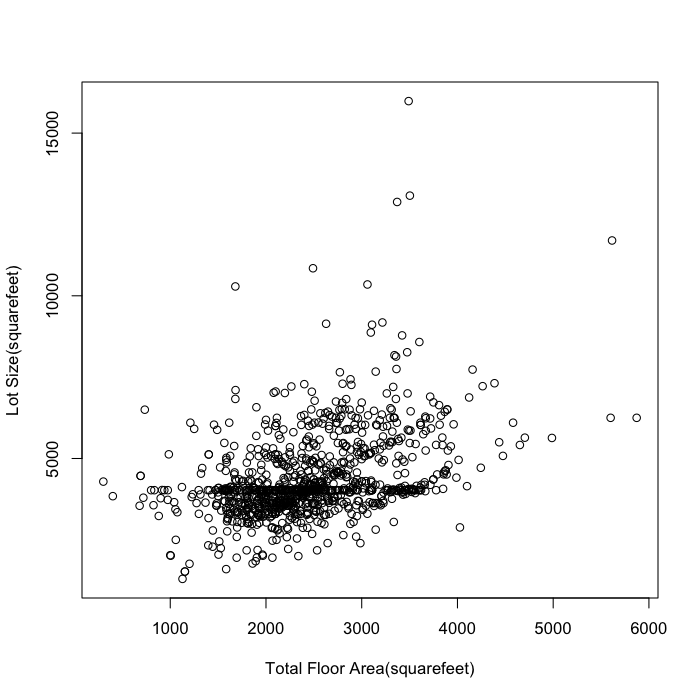

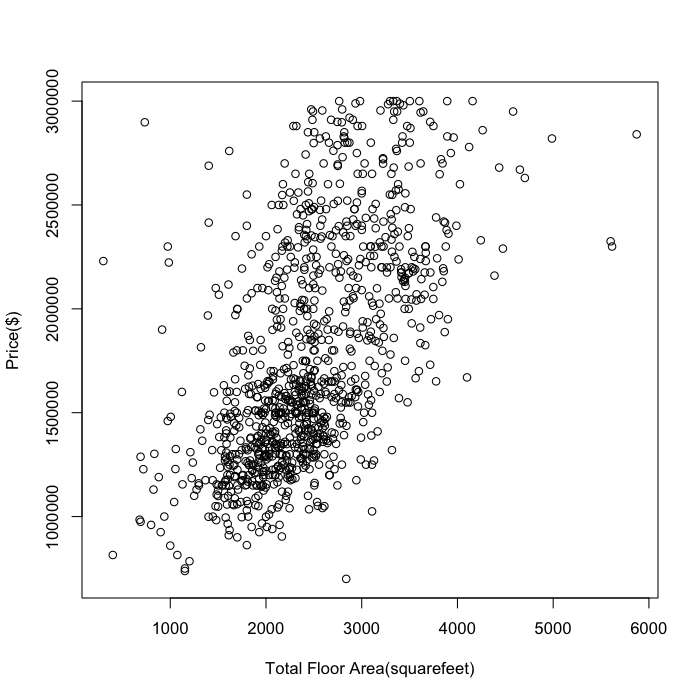

,Days.on.market,Price,Total.floor.area,Age,Lot.Size
Days.on.market,1.00000000,0.00348401,0.0650443,-0.04159980,0.07429266
Price,0.00348401,1.00000000,0.5850913,-0.23657443,0.40417159
Total.floor.area,0.06504430,0.58509127,1.0000000,-0.31673254,0.41014898
Age,-0.04159980,-0.23657443,-0.3167325,1.00000000,-0.01421683
Lot.Size,0.07429266,0.40417159,0.4101490,-0.01421683,1.00000000


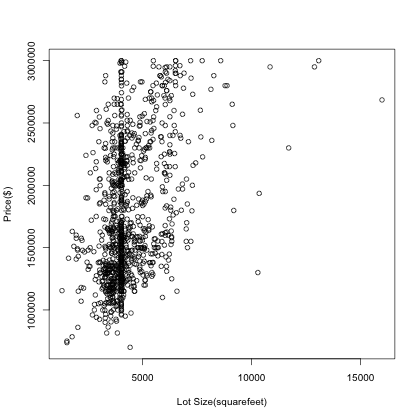

In [12]:
#Scatter plot & Correlation between explanatory variable Total Floor Area & Lot Size 

plot (mydata.train$Total.floor.area, mydata.train$Lot.Size, xlab = 'Total Floor Area(squarefeet)', ylab = 'Lot Size(squarefeet)')
plot (mydata.train$Total.floor.area, mydata.train$Price, xlab = 'Total Floor Area(squarefeet)', ylab = 'Price($)')
plot (mydata.train$Lot.Size, mydata.train$Price, xlab = 'Lot Size(squarefeet)', ylab = 'Price($)')

options(repr.plot.res = 60)

new_data<- mydata.train[,c('Days.on.market', 'Price', 'Total.floor.area', 
                           'Age','Lot.Size')]

cor(new_data)

<a id="Hyp_tests"></a>
## Hypothesis tests 

**Acquiring test statistics**

In [13]:
summary(model.f)


Call:
lm(formula = Log.price ~ Total.floor.area + Lot.Size + Age + 
    Total.floor.area * Lot.Size, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93695 -0.17534 -0.03332  0.17192  0.76088 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.332e+01  8.934e-02 149.066  < 2e-16 ***
Total.floor.area           3.426e-04  3.221e-05  10.636  < 2e-16 ***
Lot.Size                   1.263e-04  1.914e-05   6.600 6.56e-11 ***
Age                       -8.205e-04  2.240e-04  -3.663 0.000262 ***
Total.floor.area:Lot.Size -2.892e-08  6.465e-09  -4.473 8.55e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2334 on 1037 degrees of freedom
Multiple R-squared:  0.4027,	Adjusted R-squared:  0.4004 
F-statistic: 174.8 on 4 and 1037 DF,  p-value: < 2.2e-16


**Testing regression significance**
<br>
*H0: The regression is not significant*
<br>
*H1: The regression is significant*

 - **Acquiring F critical value:**

In [14]:
f.crit <- qf(0.975, 4, 1037) ; f.crit

[1] 2.798134

- **Conclusion:**
<br>
The model's p-value is < 2e-16, which is much lower than alpha = 0.05 value. The model's F-stat = 179.7 is also greater than the F-critical value of 2.798.  
Thus, the model's regression is significant (F statistic = 179.7, df error = 1037, p-value <0.05)

Since the regression is significant, we can go ahead and test the significance of the interaction term

**Testing Interaction Term**
<br>
*H0: The interaction is not significant*
<br>
*H1: The interaction is significant*

In [15]:
drop1(model.f, test="F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,56.50565,-3026.968,NA,NA
Age,1,0.7310428,57.23669,-3015.574,13.41620,2.620668e-04
Total.floor.area:Lot.Size,1,1.0903415,57.59599,-3009.053,20.01011,8.553591e-06


- **Conclusion:**
<br>
The p value of the intercation term is 0.000085 which is less than 0.05, hence, the interaction term is significant in the final model. Since the interaction term is significant, we can keep the main effects and don't need to test for them 

<a id="Prediction"></a>
## Using the model for prediction 

In [16]:
#Add transformation to the validation dataset
mydata.valid$Log.price <- log(mydata.valid$Price)

#Predict prices in the validation set using the training model
predict.vector <- predict(model.f, newdata=mydata.valid)
mydata.valid2 <- as.data.frame(cbind(mydata.valid, predict.vector))
mydata.valid2$predict.origin <- exp(mydata.valid2$predict.vector)

#Calculate prediction errors
mydata.valid2$predict.error <- mydata.valid2$Price - mydata.valid2$predict.origin

#Calculate prediction performance measures
RMSE <- sqrt(sum(mydata.valid2$predict.error^2)/(nrow(mydata.valid2)-4)) ; RMSE
MAE <- sum(abs(mydata.valid2$predict.error)/(nrow(mydata.valid2)-4)) ; MAE

mydata.valid2

[1] 451578.3

[1] 361280.8

,Number,Address,List.Date,Price,Days.on.market,Total.floor.area,Year.Built,Age,Lot.Size,Log.price,predict.vector,predict.origin,predict.error
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1043,1043,3432 E 23RD AVENUE,6/11/2019,1314000,43,2650,1966,53,3960.00,14.08859,14.37908,1756935,-442934.64
1044,1044,3379 W 23RD AVENUE,9/11/2019,2175000,14,1636,1928,91,4026.00,14.59254,14.12181,1358392,816607.68
1045,1045,5597 INVERNESS STREET,3/4/2019,1950000,145,2964,2012,7,4125.00,14.48334,14.49515,1973176,-23175.92
1046,1046,3427 MONS DRIVE,11/6/2019,1210000,1,1446,1948,71,4510.00,14.00613,14.13615,1378014,-168013.79
1047,1047,3492 E 49TH AVENUE,3/12/2020,1360000,47,2782,1972,48,4845.00,14.12300,14.45391,1893443,-533442.60
1048,1048,6282 WINDSOR STREET,12/10/2019,1380000,8,1876,1953,66,4026.00,14.13759,14.19661,1463899,-83898.80
1049,1049,4344 COLLINGWOOD STREET,2/28/2020,1850000,11,1932,1926,94,3630.00,14.43070,14.15840,1409014,440985.80
1050,1050,2742 W 2ND AVENUE,8/30/2019,2450000,30,2409,1926,93,3960.00,14.71160,14.29129,1609262,840738.32
1051,1051,2321 PARKER STREET,1/13/2020,1416000,0,1771,1947,73,4026.00,14.16335,14.16712,1421352,-5351.82


<a id="Compare"></a>
## Comparing to other candidate models 
Results in the table below:

| Model | MAE | root MSE | Model Statement|
|------|------|------|------|
| Final model | 361280.8 | 451578.3 | Log.price ~ Total.floor.area + Lot.Size + Age + Total.floor.area*Lot.Size |
| Model A | 373377.4 | 454855.2 | Price ~ Total.floor.area + Lot.Size + Age |
| Model B | 370428.0 | 460677.8 | Log.Price ~ Log.Floor + Log.Lot |


<a id="Discussion"></a>
# Discussion (400 words max.) 

The goal of the analysis was to develop a multiple linear regression model to predict sale price of houses ($ CAD) in Vancouver using potential candidate quantitative variables. 

**Strengths:**
- The model helps predict house sale price taking into account multiple variables at a time despite individually having non-linear association with the dependant variable.
- The model is easy to use and built taking in account easy to obtain variables.
- It takes into account the interaction between Total Floor Area & Lot Size which is a better fit as compared to the model without interaction term (as depicted in section below). 


**Limitations:**
- A model is as good as the data fed to it. The data has limited variables to be able to realistically asses the value of house sale price in Vancouver.   
- Multiple explanatory variables are moderately correlated to each other. While this does not affect the prediction as such it does effect the coefficient and p- values of individual variables that could effect the statistics around it.  
- The regression model has resulted in negative predictions when applied on the validation data set. Since the house sale price cannot be negative, this result is invalid or meaningless and fails to meet its utility.  
- The R squared value for our final model is 37 %. The higher the R squared value the better the model fits the data, indicating that there is vast scope of improvement.  

**Recommendations:**
- It is imperative for to conduct data cleaning for both traininga and validation datasets to increase the model's accuracy.
- In order to adopt the appropriate transformations, it is necessary to also understand how variables interact with each other in real life.
- It is likely that the independence assumption is violated in the space aspect, so future datasets and models should include quantifiable geolocation variables.

# Visualizing appropriate transformations 

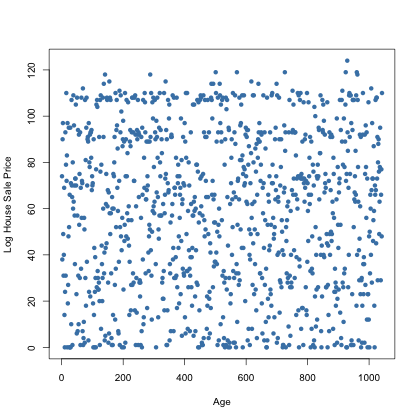

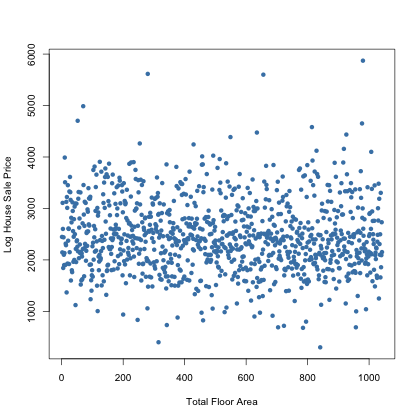

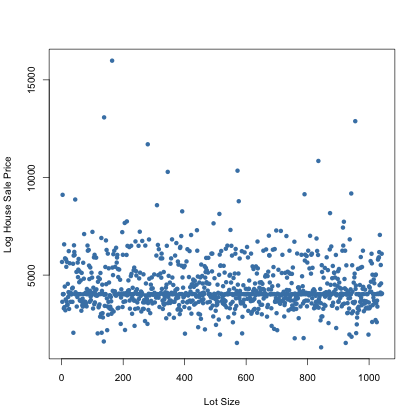

In [17]:
plot(mydata.train$Age, mydata.train$Log.Price, col = 'Steelblue', pch = 16, xlab = 'Age', ylab = 'Log House Sale Price')
plot(mydata.train$Total.floor.area, mydata.train$Log.Price, col = 'Steelblue', pch = 16, xlab = 'Total Floor Area', ylab = 'Log House Sale Price')
plot(mydata.train$Lot.Size, mydata.train$Log.Price, col = 'Steelblue', pch = 16, xlab = 'Lot Size', ylab = 'Log House Sale Price')

# Other candidate models 

In [18]:
#Fit model A
model.a <- lm(Price ~ Total.floor.area + Lot.Size + Age, data = mydata.train) 
summary(model.a)
anova(model.a)

#Predict prices in the validation set using the training model
predict.vector.A <- predict(model.a, newdata=mydata.valid)
mydata.valid.A <- as.data.frame(cbind(mydata.valid, predict.vector.A))

#Calculate prediction errors
mydata.valid.A$predict.error <- mydata.valid.A$Price - mydata.valid.A$predict.vector.A

#Calculate prediction performance measures
RMSE.A <- sqrt(sum(mydata.valid.A$predict.error^2)/(nrow(mydata.valid.A)-3)) ; RMSE.A
MAE.A <- sum(abs(mydata.valid.A$predict.error)/(nrow(mydata.valid.A)-3)) ; MAE.A



Call:
lm(formula = Price ~ Total.floor.area + Lot.Size + Age, data = mydata.train)

Residuals:
     Min       1Q   Median       3Q      Max 
-1248821  -306322   -97607   267302  1608850 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      571888.00   66008.19   8.664  < 2e-16 ***
Total.floor.area    364.54      21.96  16.599  < 2e-16 ***
Lot.Size             87.33      11.29   7.738 2.39e-14 ***
Age               -1310.83     406.11  -3.228  0.00129 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 424200 on 1038 degrees of freedom
Multiple R-squared:  0.381,	Adjusted R-squared:  0.3792 
F-statistic: 212.9 on 3 and 1038 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Total.floor.area,1,1.033154e+14,1.033154e+14,574.01704,2.504936e-101
Lot.Size,1,9.782300e+12,9.782300e+12,54.35014,3.422123e-13
Age,1,1.875185e+12,1.875185e+12,10.41846,1.286680e-03
Residuals,1038,1.868262e+14,1.799867e+11,NA,NA


[1] 454855.2

[1] 373377.4

In [19]:
#Transform dataset variables for model B
Log.Floor <- log(mydata$Total.floor.are)
Log.Lot <- log(mydata$Lot.Size)
Log.Price <- log(mydata$Price)
mydata.B <- as.data.frame(cbind(mydata,Log.Price))
mydata.B$Log.Floor <- Log.Floor
mydata.B$Log.Lot <- Log.Lot
mydata.train.B <- mydata.B[1:1042,]
mydata.valid.B <- mydata.B[1043:nrow(mydata.B),]

#Fit model B
model.b <- lm(Log.Price ~ Log.Floor + Log.Lot, data = mydata.train.B) 
summary(model.b)
anova(model.b)

#Predict prices in the validation set using the training model
predict.vector.B <- predict(model.b, newdata=mydata.valid.B)
mydata.valid.B <- as.data.frame(cbind(mydata.valid.B, predict.vector.B))
mydata.valid.B$predict.origin <- exp(mydata.valid.B$predict.vector.B)

#Calculate prediction errors
mydata.valid.B$predict.error <- mydata.valid.B$Price - mydata.valid.B$predict.origin

#Calculate prediction performance measures
RMSE.B <- sqrt(sum(mydata.valid.B$predict.error^2)/(nrow(mydata.valid2)-2)) ; RMSE.B
MAE.B <- sum(abs(mydata.valid.B$predict.error)/(nrow(mydata.valid2)-2)) ; MAE.B


Call:
lm(formula = Log.Price ~ Log.Floor + Log.Lot, data = mydata.train.B)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98464 -0.18649 -0.01646  0.17400  1.24623 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.62914    0.25896  33.323  < 2e-16 ***
Log.Floor    0.47450    0.02647  17.927  < 2e-16 ***
Log.Lot      0.24320    0.03079   7.899 7.15e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2415 on 1039 degrees of freedom
Multiple R-squared:  0.3596,	Adjusted R-squared:  0.3584 
F-statistic: 291.7 on 2 and 1039 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Log.Floor,1,30.383908,30.38390843,521.04709,8.463851e-94
Log.Lot,1,3.638039,3.63803856,62.38794,7.145624e-15
Residuals,1039,60.587385,0.05831317,NA,NA


[1] 460677.9

[1] 370428